In [2]:
import os

In [18]:
import numpy as np
import pandas as pd
from math import *
from collections import Counter

path = "../sim/results/"
pir_list = [50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000]
burst_list = [1, 2]
# pir_list = [500]
# burst_list = [1, 2]
traffic_burst = 2
most_common_percentage_threshold = 0.02

mean_latencies_burst = list()
disp_latencies_burst = list()

file_prefix = "burst_mesh_18x10_DOR_mp_4_sv_3_sh_3"

for burst in burst_list:
  mean_latencies = list()
  disp_latencies = list()
  for pir in pir_list:
    file = '_'.join([file_prefix, "pir", str(pir), "ps", str(burst), "bs", str(traffic_burst), "latency_burst.log"])

    latencies = list()
    lat_distribution = dict()

    with open(path + file, 'r') as f:
      data_lines = f.readlines()
      for line in data_lines:
        latency = int(line.split()[-1])
        latencies.append(latency)
      latency_counter = Counter(latencies)
      threshold = latency_counter.most_common(1)[0][1] * most_common_percentage_threshold
      latencies_ = np.array(latencies)
      latencies_.sort()
      min_num = 0
      for i, latency in enumerate(latencies_[::-1]):
        if latency_counter[latency] < threshold:
          min_num = latencies_.size - i
        else:
          break
      if min_num == 0:
        min_num = latencies_.size
      latencies_=latencies_[:min_num]
    data = np.array(latencies_)
    min_num = int(data.size)
    data.sort()
    data=data[:min_num]
    max_lat = data[-1]
    mean_latencies.append(np.mean(data))
    disp_latencies.append(sqrt(np.var(data)))
  print(burst)
  print(mean_latencies)
  print(disp_latencies)
  mean_latencies_burst.append(mean_latencies)
  disp_latencies_burst.append(disp_latencies)

df = pd.DataFrame(mean_latencies_burst)
df.to_excel(file_prefix + ".xlsx")

1
[45.61254468638284, 46.20554531085353, 47.002029998872224, 47.74461480088991, 48.40802054075524, 49.44999698158769, 50.86718460577707, 52.59136674324286, 58.668050124351254, 69.15415844249058, 76.58509330486952, 81.73554108947752, 84.22210353388388, 87.28996404053612]
[17.00609418549489, 17.308278208398033, 17.58178480168905, 17.751866072237146, 18.227307280257875, 18.759943828646186, 19.509611742193147, 20.61504391697434, 24.89063713344972, 33.18664630668141, 39.51869227349595, 44.10355230769232, 45.67039486565373, 48.13264626661242]
2
[45.91385199240987, 46.154675578535844, 46.269961174881836, 46.42447115832634, 46.665396553029346, 46.73419715973878, 46.86948004097845, 47.1119464404419, 47.91089971954825, 49.108826384199865, 50.53635739700544, 54.05207594610277, 63.80200040665029, 70.08723238807451]
[16.835853481632796, 17.1496302163863, 17.193412672591364, 17.233952536936997, 17.305616032634433, 17.39007123098051, 17.406563311196265, 17.54992390610227, 17.93123044262757, 18.540284

In [14]:
import numpy as np
import pandas as pd
from math import *

path = "../sim/results/"

ve_tile_x = '[x][3][0]'
ve_tile_y = '[y][3][0]'

pir = 100
burst = 2
traffic_burst = 2

file = '_'.join(["burst_mesh_18x10_DOR_mp_4_sv_3_sh_3_pir", str(pir), "ps", str(burst), "bs", str(traffic_burst), "latency_burst.log"])

latencies = list()
lat_distribution = dict()

with open(path + file, 'r') as f:
  data_lines = f.readlines()
  for line in data_lines:
    # if line.split()[0] == ve_tile_x or line.split()[0] == ve_tile_y:
      latency = int(line.split()[-1])
      latencies.append(latency)

  latency_counter = Counter(latencies)
  threshold = latency_counter.most_common(1)[0][1] * 0.02
  latencies_ = np.array(latencies)
  latencies_.sort()
  min_num = 0
  for i, latency in enumerate(latencies_[::-1]):
    if latency_counter[latency] < threshold:
      min_num = latencies_.size - i
    else:
      break
  latencies_=latencies_[:min_num]
  for line in data_lines:
    if line.split()[0] == ve_tile_x or line.split()[0] == ve_tile_y:
      mem_tile = line.split()[2]
      latency = int(line.split()[-1])
      if mem_tile not in lat_distribution.keys():
        lat_distribution[mem_tile] = list()
      if latency in latencies_:
        lat_distribution[mem_tile].append(latency)

print("most common", latency_counter.most_common(1)[0])
data = latencies_
min_num = int(data.size)
max_lat = data[-1]
print(np.mean(data))
print(sqrt(np.var(data)))
print(data.size)
print(max_lat)


most common (40, 1438)
46.23444705882353
17.10195766996388
31875
90


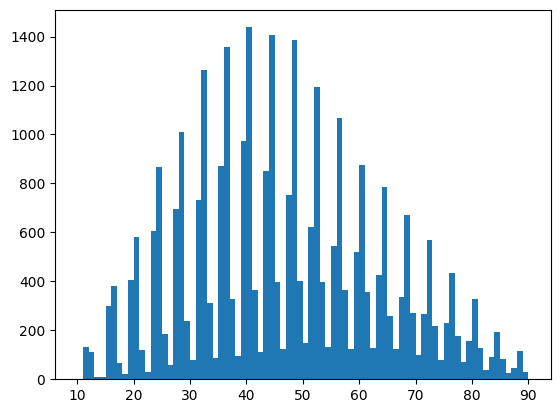

In [15]:
import matplotlib.pyplot as plt

bins = list(range(int(np.min(data))-1, int(np.max(data)) + 1))

plt.hist(data, bins)

plt.show()

Text(52.35935103380576, 220, 'Variance: 43.42')

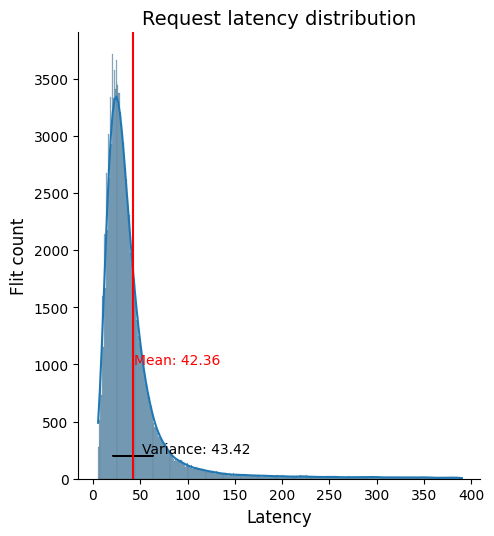

In [39]:
import seaborn as sns

plot = sns.displot(data=data, kde=True, bins=bins, legend=False)
plt.xlabel("Latency", size=12)
plt.ylabel("Flit count", size=12)
plt.title("Request latency distribution", size=14)
plt.axvline(x=data.mean(), color='red')
plt.arrow(
  x=data.mean()-sqrt(data.var())/2,
  y=200,
  dx=sqrt(data.var()),
  dy=0,
  color='black'
)
plt.text(x=data.mean()+1, y=1000, s=f"Mean: {format(data.mean(), '.2f') }", color='red')
plt.text(x=data.mean()+10, y=220, s=f"Variance: {format(sqrt(data.var()), '.2f') }", color="black")

In [72]:
stat_distribution = dict()

stat_distribution['Mem Node X'] = list()
stat_distribution['Mem Node Y'] = list()
stat_distribution['Mean'] = list()
stat_distribution['Variance'] = list()

for key in lat_distribution.keys():
  lat_distribution[key] = np.array(lat_distribution[key])
  lat_handled = list()
  for lat in lat_distribution[key]:
    if lat < max_lat:
      lat_handled.append(lat)
  lat_handled = np.array(lat_handled)
  x_line = key[:key.find(']')+1]
  y_line = key[key.find(']')+1:key.find(':')]
  stat_distribution['Mem Node X'].append(int(x_line[x_line.find('[')+1:x_line.find(']')]))
  stat_distribution['Mem Node Y'].append(int(y_line[y_line.find('[')+1:y_line.find(']')]))
  stat_distribution['Mean'].append(lat_handled.mean())
  stat_distribution['Variance'].append(sqrt(lat_handled.var()))

df = pd.DataFrame(stat_distribution)
df = df.sort_values(by=['Mem Node X', 'Mem Node Y'])
df.to_excel("lat.xlsx")